<a href="https://colab.research.google.com/github/harshh-mahajan/Natural-Language-Processing/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk as nltk
# import gensim as gs
# import spacy as sp
# import textblob as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [8]:
data = pd.read_csv('/content/spam (1).csv',encoding='latin-1')

In [9]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
for i in range(len(data.columns)):

  a= data.columns[i]
  print('column: ',i,'Null vals',data[a].isnull().sum()/data.shape[0] * 100)

column:  0 Null vals 0.0
column:  1 Null vals 0.0
column:  2 Null vals 99.10265613783201
column:  3 Null vals 99.78463747307968
column:  4 Null vals 99.89231873653985


In [11]:
data.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis= 1, inplace= True)

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [14]:
data['v2'] = data['v2'].str.lower() #lower case

In [15]:
groups= data['v1']

In [16]:
groups

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()

data['v1']= enc.fit_transform(data['v1'])

print(data['v1'])

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64


In [18]:
value_counts= data['v1'].value_counts()

In [19]:
value_counts/data['v1'].shape[0] * 100

0    86.593683
1    13.406317
Name: v1, dtype: float64

In [20]:
y_l= data['v1'].to_list()

print(y_l)

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [21]:
len(y_l)

5572

In [22]:
from string import punctuation
from nltk.corpus import stopwords

In [23]:
stuff_to_be_removed= list(stopwords.words('english'))+ list(punctuation)


from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

corpus = data['v2'].tolist()
len(corpus)

5572

In [24]:
corpus

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had y

In [25]:
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)

In [26]:
y_l

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [27]:
final_corpus

['go jurong point crazy.. avail bug n gre world la e buffet ... cin got am wat ...',
 'ok lar ... jok wif u on ...',
 "fre entry 2 wkly comp win fa cup fin tkts 21st may 2005. text fa 87121 receiv entry quest std txt rat c 's apply 08452810075over18 's",
 'u dun say ear hor ... u c already say ...',
 "nah n't think goe usf liv around though",
 "freemsg hey darl 's 3 week 's word back 'd lik fun stil tb ok xxx std chgs send å£1.50 rcv",
 'ev broth lik speak tre lik aid pat',
 "per request 'melle mel oru minnaminungint nurungu vettam set callertun cal press *9 cop friend callertun",
 'win valu network custom select receive å£900 priz reward claim cal 09061701461. claim cod kl341 valid 12 hour',
 'mobl 11 month u r entitl upd latest colo mobl camer fre cal mobl upd co fre 08002986030',
 "'m gon na hom soon n't want talk stuff anym tonight k 've cri enough today",
 'six chant win cash 100 20,000 pound txt csh11 send 87575. cost 150p/day 6days 16+ tsandc apply reply hl 4 info',
 'urg 1 week

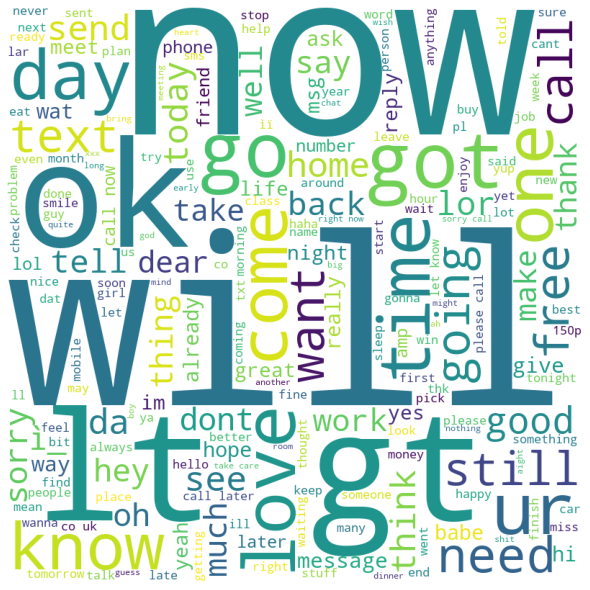

In [28]:
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.v2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [29]:
newdf = pd.DataFrame(final_corpus)
newdf['label'] = y_l

newdf.columns=['sentence','label']

In [30]:
newdf

,sentence,label
0,go jurong point crazy.. avail bug n gre world ...,0
1,ok lar ... jok wif u on ...,0
2,fre entry 2 wkly comp win fa cup fin tkts 21st...,1
3,u dun say ear hor ... u c already say ...,0
4,nah n't think goe usf liv around though,0
...,...,...
5567,2nd tim tri 2 contact u. u å£750 pound priz 2 ...,1
5568,ì_ b going esplanad fr hom,0
5569,pity mood ... suggest,0
5570,guy bitch act lik 'd interest buy someth els n...,0


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(newdf['sentence'])


x = vector.toarray()
y= newdf['label']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
print(x_train)
print(x_test)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.25153007 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
print(y_train)
print(y_test)

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label, Length: 4457, dtype: int64
3245    0
944     0
1044    1
2484    0
812     1
       ..
4264    0
2439    0
5556    0
4205    0
4293    1
Name: label, Length: 1115, dtype: int64


In [35]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()

ab.fit(x_train,y_train)
ypred = ab.predict(x_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Accuracy =',accuracy_score(y_test,ypred))

print('\n', confusion_matrix(y_test,ypred))

print('\n', classification_report(y_test,ypred))

Accuracy = 0.9650224215246637

 [[965   0]
 [ 39 111]]

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)
ypred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9650224215246637
[[960   5]
 [ 34 116]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.96      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.96      0.88      0.92      1115
weighted avg       0.96      0.97      0.96      1115



In [37]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9659192825112107
[[943  22]
 [ 16 134]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.86      0.89      0.88       150

    accuracy                           0.97      1115
   macro avg       0.92      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [38]:
ab = MultinomialNB() 

ab.fit(x_train,y_train)
ypred = ab.predict(x_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Accuracy =',accuracy_score(y_test,ypred))

print('\n', confusion_matrix(y_test,ypred))

print('\n', classification_report(y_test,ypred))

Accuracy = 0.9650224215246637

 [[965   0]
 [ 39 111]]

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [39]:
from sklearn.metrics import f1_score

score = f1_score(y_test, ypred, average='macro')
print("Test F1_Score: MULTINOMIAL NAIVE BAYES  {}".format(score))

Test F1_Score: MULTINOMIAL NAIVE BAYES  0.9153838520049269


In [57]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()

gnb.fit(x_train,y_train)
ypred_1 = gnb.predict(x_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Accuracy =',accuracy_score(y_test,ypred_1))

print('\n', confusion_matrix(y_test,ypred_1))

print('\n', classification_report(y_test,ypred_1))

Accuracy = 0.912751677852349

 [[137  10]
 [ 16 135]]

               precision    recall  f1-score   support

           0       0.90      0.93      0.91       147
           1       0.93      0.89      0.91       151

    accuracy                           0.91       298
   macro avg       0.91      0.91      0.91       298
weighted avg       0.91      0.91      0.91       298



In [41]:
score1 = f1_score(y_test, ypred_1, average='macro')
print("Test F1_Score: GaussianNB {}".format(score1))

Test F1_Score: GaussianNB 0.7705431714315667


In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()

rfc.fit(x_train,y_train)
ypred_2 = rfc.predict(x_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Accuracu =',accuracy_score(y_test,ypred_2))

print('\n', confusion_matrix(y_test,ypred_2))

print('\n', classification_report(y_test,ypred_2))

Accuracu = 0.9775784753363229

 [[965   0]
 [ 25 125]]

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
score2 = f1_score(y_test, ypred_2, average='macro')
print("Test F1_Score: Random Forest  {}".format(score2))

Test F1_Score: Random Forest  0.9481515926528714


In [44]:
df_majority = newdf[newdf.label==0]
df_minority = newdf[newdf.label==1]

In [45]:
len(df_majority)

4825

In [46]:
len(df_minority)

747

In [47]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=740,     # to match minority class
                                 random_state=123) # reproducible results

In [48]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [49]:
# Display new class counts
df_downsampled.label.value_counts()

1    747
0    740
Name: label, dtype: int64

In [50]:
df_downsampled

,sentence,label
4307,ha ha pop loo hello-ed hello,0
4138,ev green quot ev told jerry cartoon \a person ...,0
4831,rat hey u ev vot next them,0
4461,sorry flak last night shit 's sery goin room t...,0
5440,thank gen dat brotha,0
...,...,...
5537,want explicit sex 30 sec ring 02073162414 cost...,1
5540,ask 3mobile 0870 chatlin inclu fre min ind cus...,1
5547,contract mobl 11 mnths latest motorol nok etc ...,1
5566,remind o2 get 2.50 pound fre cal credit detail...,1


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(df_downsampled['sentence'])


x = vector.toarray()
y= df_downsampled['label']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
print(x_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3748    1
1673    1
1374    1
5122    0
2466    0
       ..
2846    1
4106    1
812     1
5365    1
2821    1
Name: label, Length: 1189, dtype: int64


In [54]:
print(x_test)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4254    1
5294    1
4609    0
3451    0
3855    0
       ..
20      0
2668    1
5537    1
5487    1
5482    1
Name: label, Length: 298, dtype: int64


In [55]:
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()

ab.fit(x_train,y_train)
ypred = ab.predict(x_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Accuracu =',accuracy_score(y_test,ypred))

print('\n', confusion_matrix(y_test,ypred))

print('\n', classification_report(y_test,ypred))

Accuracu = 0.9093959731543624

 [[139   8]
 [ 19 132]]

               precision    recall  f1-score   support

           0       0.88      0.95      0.91       147
           1       0.94      0.87      0.91       151

    accuracy                           0.91       298
   macro avg       0.91      0.91      0.91       298
weighted avg       0.91      0.91      0.91       298



In [56]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)
ypred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9194630872483222
[[144   3]
 [ 21 130]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       147
           1       0.98      0.86      0.92       151

    accuracy                           0.92       298
   macro avg       0.93      0.92      0.92       298
weighted avg       0.93      0.92      0.92       298

